In [1]:
import numpy as np

In [2]:
np.random.seed(42)

### задание 1  
Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [3]:
def calc_logloss(y, y_pred):
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

Для примера сначала посчитаю на абстрактных данных неизмененную функцию

In [4]:
y = np.random.randint(0, 2, 50)
y

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1])

In [5]:
y_pred = np.random.rand(50)
y_pred = np.where(y_pred < 0.05, 0, y_pred)
y_pred = np.where(y_pred > 0.95, 1, y_pred)
y_pred

array([0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.        ,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 1.        ,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.        , 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       1.        , 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.        , 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 1.        ,
       0.77224477, 0.19871568, 0.        , 0.81546143, 0.70685734])

In [6]:
calc_logloss(y, y_pred)

<ipython-input-3-7d5907c1794a>:2: RuntimeWarning: divide by zero encountered in log
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
<ipython-input-3-7d5907c1794a>:2: RuntimeWarning: invalid value encountered in multiply
  err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))


nan

Ну очевидным решением будет замена нуля на число близкое к нулю, например, 0.00001. Можно использовать метод where

In [7]:
def calc_logloss(y, y_pred):
    y_pred = np.where(y_pred == 0, 0.00001, y_pred)
    y_pred = np.where(y_pred == 1, 0.99999, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

In [8]:
calc_logloss(y, y_pred)

1.1483333926636308

Ну немного синтетический пример получился))потому что сначала я синтетически делал нули и единицы в массиве предсказаний, а затем из обратно убирал, но вроде такой подход работает

### задание 2
Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

In [10]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [11]:
def calc_logloss(y, y_pred):
    y_pred = np.where(y_pred == 0, 0.00001, y_pred)
    y_pred = np.where(y_pred == 1, 0.99999, y_pred)
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err

Немного изменил алгоритм из того что был на лекции

In [12]:
def eval_model_2(X, y, stop_loss=0.0001, max_iter=1000, alpha=1e-5):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    #  first loop for initializing
    z = np.dot(W, X)
    y_pred = sigmoid(z)
    err = calc_logloss(y, y_pred)
    best_model = {"coefficients": W, "error": err}
    iterations = 1

    while (err > stop_loss) and (iterations != (max_iter + 1)):
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        if err < best_model["error"]:
            best_model = {"coefficients": W, "error": err}
        if (iterations % 100) == 0:
            print(f"Number of iterations {iterations} estimated error {err}")
        iterations += 1
    return best_model

In [13]:
best_model = eval_model_2(X, y)

Number of iterations 100 estimated error 5.756467732512389
Number of iterations 200 estimated error 0.9091845102102731
Number of iterations 300 estimated error 0.9091673359274953
Number of iterations 400 estimated error 0.9091501617080537
Number of iterations 500 estimated error 0.9091329875524995
Number of iterations 600 estimated error 0.9091158134613841
Number of iterations 700 estimated error 0.9090986394352594
Number of iterations 800 estimated error 0.9090814654746753
Number of iterations 900 estimated error 0.9090642915801832
Number of iterations 1000 estimated error 0.9090471177523316


In [14]:
best_model["coefficients"]

array([ 0.49550009, -0.1403574 , -0.00414953,  1.52264613])

### задание 3  
Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [15]:
def calc_pred_proba(W, X):
    z = np.dot(W, X)
    return sigmoid(z)

In [16]:
calc_pred_proba(best_model["coefficients"], X)

array([0.45091443, 0.26368886, 0.53691502, 0.3516191 , 0.05229711,
       0.21391627, 0.13439504, 0.00957292, 0.50262493, 0.29122261])

### задание 4 
Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [17]:
def calc_pred(W, X, threshold=0.5):
    out = calc_pred_proba(W, X)
    return np.where(out > threshold, 1, 0)

In [18]:
calc_pred(best_model["coefficients"], X)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0])

In [19]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

### задание 5
Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.

In [20]:
y_pred = calc_pred(best_model["coefficients"], X)

In [21]:
def calculate_all(y, y_pred):
    import pandas as pd
    TN = np.sum((y == 0) * (y_pred == 0))
    TP = np.sum((y == 1) * (y_pred == 1))
    FN = np.sum((y == 1) * (y_pred == 0))
    FP = np.sum((y == 0) * (y_pred == 1))
    accuracy = (TP + TN) / y.shape[0]
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = (2 * precision * recall) / (precision + recall)
    matrix_of_errs = pd.DataFrame([[TN, FN], [FP, TP]], columns=["y=0", "y=1"], index=["y_pred=0", "y_pred=1"])
    return matrix_of_errs, f"accuracy={accuracy}", f"prercision={precision}", f"recall={recall}", f"F1-score={f1_score}"

In [22]:
calculate_all(y, y_pred)

(          y=0  y=1
 y_pred=0    5    3
 y_pred=1    0    2,
 'accuracy=0.7',
 'prercision=1.0',
 'recall=0.4',
 'F1-score=0.5714285714285715')

In [23]:
y.shape[0]

10

In [24]:
np.sum((y == 0) * (y_pred == 1))

0

In [25]:
np.sum((y == 1) * (y_pred == 0))

3

In [26]:
np.sum((y == 1) * (y_pred == 1))

2

### задание 6
Могла ли модель переобучиться? Почему?

В цикле обучения остановка происходит либо когда ошибка достигает нижней границы, либо когда количество итераций превышает определенное число (в нашем случае 1000) из лога функции видно, что наилучшая оценка достигается на промежутке между 100 и 200 итерацией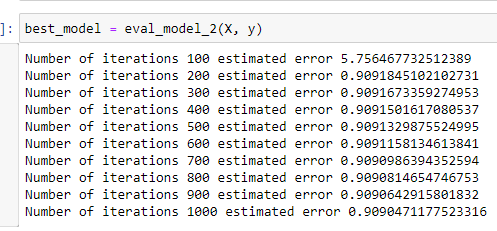  
На мой взгляд переобучения в принципе не может произойти на линейных моделях (когда мы используем только одну линейную модель) поскольку она дает только одну разделяющую гиперплоскость, и эффекта переобучения в принципе не может наступить, потому что вариативность принятия решений ограничена этой плоскостью. Насколько я могу объяснить на пальцах, что эффект переобучения достигается когда модель просто запоминает обучающие данные, а в случае с одной линейной моделью мне кажется в принципе это сделать невозможно....исключая случай когда все эти данные будут просто лежать на прямой/плоскости.  

Я скачал с кагла датасет по поводу предсказаний подходящего репетитора....попробую обучить модель на этих данных и посмотреть какие ошибки она будет давать на обучающей и тестовой выборке.

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams["figure.figsize"] = 10, 5

In [28]:
df = pd.read_csv("train.csv")

In [29]:
df.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [30]:
X = df.loc[:, "age": "mean_exam_points"]
y = df.loc[:, "choose"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Придется немного изменить функции, чтобы они выдали массив ошибок на обучающей выборке и на тестовой выборке

In [32]:
def eval_model_3(X_train, X_test, y_train, y_test, stop_loss=0.0001, max_iter=1000, alpha=1e-5):
    np.random.seed(42)
    W = np.random.randn(X_train.shape[0])
    n = X_train.shape[1]
    #  first loop for initializing
    z = np.dot(W, X_train)
    y_pred_train = sigmoid(z)
    err_train = calc_logloss(y_train, y_pred_train)
    best_model = {"coefficients": W, "error": err_train}
    iterations = 1
    list_of_train_erros = [err_train]
    print(f"Number of iterations {iterations} estimated error {err_train}")
    
    # estimate on test_data
    z_test = np.dot(W, X_test)    
    y_pred_test = sigmoid(z_test)
    err_test = calc_logloss(y_test, y_pred_test)
    list_of_test_erros = [err_test]
    
    while (err_train > stop_loss) and (iterations != (max_iter + 1)):
        W -= alpha * (1/n * np.dot((y_pred_train - y_train), X_train.T))
        z = np.dot(W, X_train)
        y_pred_train = sigmoid(z)
        err_train = calc_logloss(y_train, y_pred_train)
        if err_train < best_model["error"]:
            best_model = {"coefficients": W, "error": err_train}
        if (iterations % 100) == 0:
            print(f"Number of iterations {iterations} estimated error {err_train}")
        iterations += 1
        list_of_train_erros.append(err_train)
        
        # estimate on test_data
        z_test = np.dot(W, X_test)    
        y_pred_test = sigmoid(z_test)
        err_test = calc_logloss(y_test, y_pred_test)
        list_of_test_erros.append(err_test)
        
    return best_model, list_of_train_erros, list_of_test_erros

In [33]:
best_model_2, train_errs, test_errs = eval_model_3(X_train.to_numpy().T, 
                                                   X_test.to_numpy().T, 
                                                   y_train.to_numpy(), 
                                                   y_test.to_numpy())

Number of iterations 1 estimated error 10.254728274879433
Number of iterations 100 estimated error 1.5098927245134546
Number of iterations 200 estimated error 1.504681317901311
Number of iterations 300 estimated error 1.4994796210301875
Number of iterations 400 estimated error 1.4942876110951115
Number of iterations 500 estimated error 1.4891052652912242
Number of iterations 600 estimated error 1.4839325607994531
Number of iterations 700 estimated error 1.478769474771936
Number of iterations 800 estimated error 1.4736159843183554
Number of iterations 900 estimated error 1.4684720664927429
Number of iterations 1000 estimated error 1.4633376982810031


In [34]:
best_model_2

{'coefficients': array([ 4.68663972e-01, -1.38712845e-01, -1.54641421e-03,  1.52295705e+00,
        -2.33871536e-01, -2.34050627e-01,  1.57922264e+00,  7.67420023e-01,
        -4.69485683e-01,  5.42551955e-01, -4.68531045e-01]),
 'error': 1.4633376982810031}

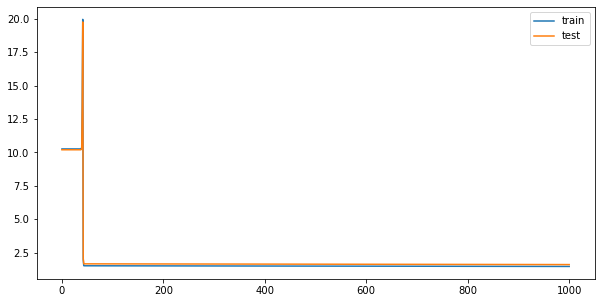

In [35]:
plt.plot(train_errs, label="train")
plt.plot(test_errs, label="test")
plt.legend()

на графике особо ничего не видно, поэтому приблизим ту часть, где графики умньшаются до определенной точки

(0.0, 5.0)

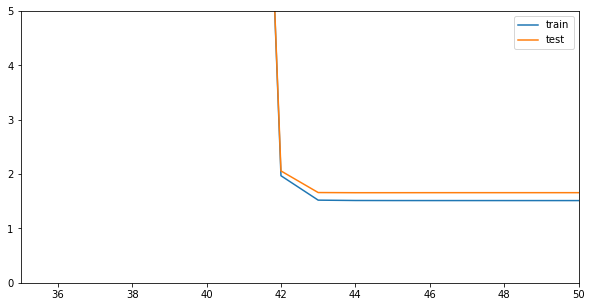

In [36]:
plt.plot(train_errs, label="train")
plt.plot(test_errs, label="test")
plt.legend()
plt.xlim(35, 50)
plt.ylim(0, 5)

В принципе на графике этом и на графике чуть выше видно, что на 43 иитерации достигается минимум по ошибке на обучающей выборке и в дальнейшем она не меняется. Таже ситуация с тестовой выборкой, при этом после 43 итерации не проиходит больше какого-то движения оценок. А в случае переобучения, модель давала бы с каждой итерацией (после 43) меньшую ошбику на обучающей выборке, но большую....или примерно такую же как и на прошлой итерации ошибку на тестовой выборке